In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Machine learning packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data.csv')

In [ ]:
df = df.drop(['Unnamed: 0','Currency','Released','App Name','App Id','Category','Minimum Installs','Maximum Installs','Minimum Android','Last Updated','Content Rating','Ad Supported','In App Purchases','Editors Choice'], axis = 1)

In [59]:
from regressors import stats
import statsmodels.api as sm

X = df[predictors3]
y = df[target]
#X = sm.add_constant(X) # adding a constant

model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Rating   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          8.405e+05
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:26:57   Log-Likelihood:                     -5.6234e+05
No. Observations:              399284   AIC:                                  1.125e+06
Df Residuals:                  399276   BIC:                                  1.125e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## LASSO & RIDGE

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


#Scaling parameters

scaler = StandardScaler()
df[['Size','ReleaseMonth']] = scaler.fit_transform(df[['Size','ReleaseMonth']])
                            

In [44]:
# Running LASSO with alpha. = 0.5
X = df[predictors3]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

Lasso(alpha=0.5)

In [45]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 0.0
Lasso Regression: R^2 score on test set -9.473982134355907e-05


In [46]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)


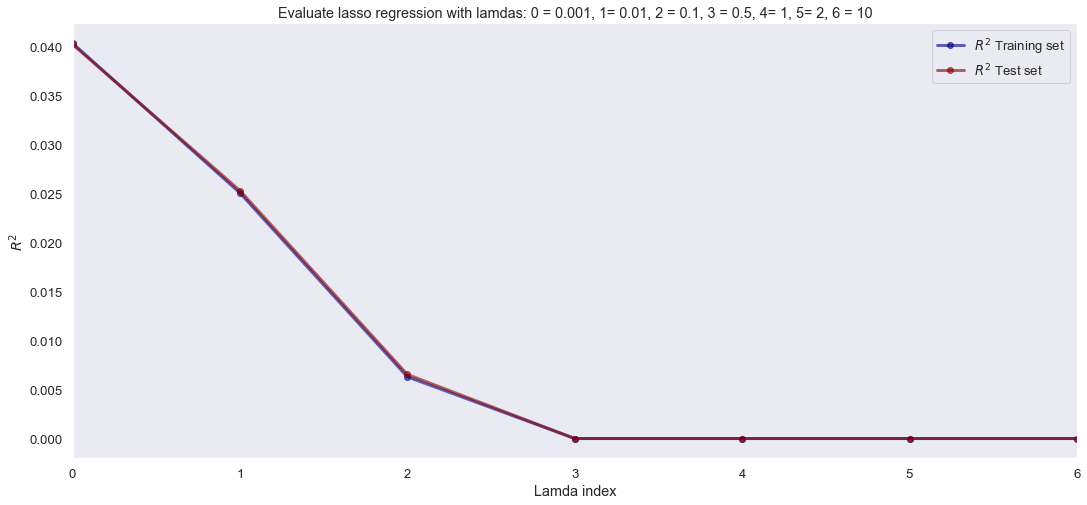

In [47]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [48]:
X = df[predictors3]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


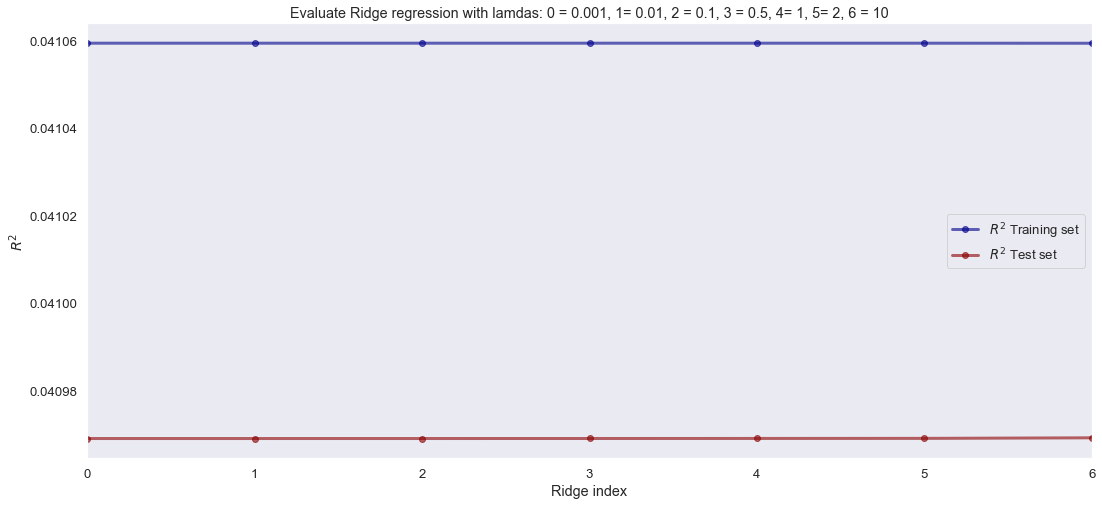

In [49]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Ridge index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate Ridge regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

## Polynomial Regresssion

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
X = df[predictors3]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)



reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

d = range(1,4)
for degree in d:
    poly = PolynomialFeatures(degree=degree)
    Xpoly = poly.fit_transform(X)
    Xpoly_test = poly.fit_transform(X_test)

    polyreg = LinearRegression()
    polyreg.fit(Xpoly, y)
    predpoly = polyreg.predict(Xpoly_test)

    mae2 = mean_absolute_error(y_test, predpoly)
    mse2 = mean_squared_error(y_test, predpoly)
    r2poly = r2_score(y_test,pred)
    
    print('Degree: ', degree)
    print('MAE: ', mae2)
    print('RMSE: ', np.sqrt(mse2))
    print('R2: ', r2poly)


Degree:  1
MAE:  0.446413433712156
RMSE:  0.5933110890410038
R2:  0.04096908835257029
Degree:  2
MAE:  0.44317807024217165
RMSE:  0.5901446917574155
R2:  0.04096908835257029
Degree:  3
MAE:  0.442690020660454
RMSE:  0.589594812542807
R2:  0.04096908835257029


In [ ]:
## NEW CODE